In [38]:
#| default_exp spiral

# Spiral

> API details.

from nbdev.showdoc import *
import math
import numpy as np
import  matplotlib.pyplot as plt

In [39]:
#| export
import numpy as np
import  matplotlib.pyplot as plt

In [40]:
#| export
def foo(): pass

def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [41]:
#|export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [42]:
say_hello("Isaac")

'Hello Isaac!'

In [43]:
assert say_hello("Hamel")=="Hello Hamel!"

t = np.linspace(0,40,100)
v = 0.11 # velocity in rad/s
B = 8.6e-6 # spiral arm distance
r_max=800e-6
t_max=3.14*(r_max)**2/(B*v)
t_max

In [44]:
#| export
t = np.linspace(0,40,100)
v = 0.11 # velocity in rad/s
B = 8.6e-6 # spiral arm distance
r_max=800e-6
t_max=3.14*(r_max)**2/(B*v)*2
t_max

4.24862579281184

In [45]:
#| export
def phi(B,v,t, flag_out, t_max, spiral_count): #asdfsafd
    if flag_out:
        
        phi1 = np.sqrt(4*np.pi/B*v*(t-t_max*(spiral_count+1)))
        r=B*phi1/(2*np.pi)
       # print(phi1)
        if r >= 800e-6:
            flag_out=0
            spiral_count=spiral_count+1
            #t_max=t
    else:
        if ((4*np.pi/B*v*((spiral_count+1)*t_max-t))>=0):
            phi1 = np.sqrt(4*np.pi/B*v*((spiral_count+1)*t_max-t))
            
        else:
            phi1=0.0
        r=B*phi1/(2*np.pi)
        if r <= 5e-6:
            flag_out=1  
            t_max=t   
    return phi1, flag_out, r, spiral_count


In [48]:
#| export
flag_out=1
t = np.linspace(0,12,1000)
phi_list=[]
time_list=[]
flag_out_list=[]
r_list=[]
spiral_count=0
spiral_count_list=[]
for i in t:
    #print(i)
    phi1,flag_out, r, spiral_count=phi(B,v,i, flag_out, t_max,spiral_count)
    #
    # print(phi1, flag_out)
    phi_list.append(phi1)
    time_list.append(i)
    flag_out_list.append(flag_out)
    r_list.append(r)
    spiral_count_list.append(spiral_count)


/var/folders/6b/_bbrkl_x06d4ktdj27cj93hr0000gn/T/ipykernel_56233/2666025461.py:4: RuntimeWarning: invalid value encountered in sqrt
  phi1 = np.sqrt(4*np.pi/B*v*(t-t_max*(spiral_count+1)))


## Phase of spiral
The pase of the spiral has to grow and shrink for in and out going spirals as shown in @fig-polar.

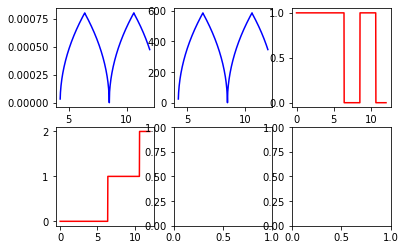

In [49]:
fig, axs = plt.subplots(2,3)

axs[0,0].plot(time_list,r_list, 'b')
axs[0,1].plot(time_list,phi_list, 'b')
axs[0,2].plot(time_list,flag_out_list, 'r')
axs[1,0].plot(time_list,spiral_count_list, 'r', label='D=1m')
# plt.title("Spiral vs time")
# plt.xlabel("time [s]")
# plt.ylabel("phi")
# show the plot
#plt.xlim((10,2e4))
#plt.ylim((1e-19,1e-12))
plt.show()

In [50]:
time_list

[0.0,
 0.012012012012012012,
 0.024024024024024024,
 0.036036036036036036,
 0.04804804804804805,
 0.06006006006006006,
 0.07207207207207207,
 0.08408408408408408,
 0.0960960960960961,
 0.10810810810810811,
 0.12012012012012012,
 0.13213213213213212,
 0.14414414414414414,
 0.15615615615615616,
 0.16816816816816815,
 0.18018018018018017,
 0.1921921921921922,
 0.2042042042042042,
 0.21621621621621623,
 0.22822822822822822,
 0.24024024024024024,
 0.25225225225225223,
 0.26426426426426425,
 0.27627627627627627,
 0.2882882882882883,
 0.3003003003003003,
 0.3123123123123123,
 0.32432432432432434,
 0.3363363363363363,
 0.3483483483483483,
 0.36036036036036034,
 0.37237237237237236,
 0.3843843843843844,
 0.3963963963963964,
 0.4084084084084084,
 0.42042042042042044,
 0.43243243243243246,
 0.4444444444444444,
 0.45645645645645644,
 0.46846846846846846,
 0.4804804804804805,
 0.4924924924924925,
 0.5045045045045045,
 0.5165165165165165,
 0.5285285285285285,
 0.5405405405405406,
 0.5525525525525525